In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from my_fun.reverse_colourmap import reverse_colourmap

In [3]:
filename_nc  = 'in/sh_levels.nc'

ds = xr.open_dataset(filename_nc)
ds

<xarray.Dataset>
Dimensions:    (latitude: 1, level: 37, longitude: 41, time: 480)
Coordinates:
  * longitude  (longitude) float32 -80.0 -79.75 -79.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 -8.96
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2019-12-01T12:00:00
Data variables:
    q          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-18 16:05:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
filename_nc  = 'in/dem_profile.nc'

ds_dem = xr.open_dataset(filename_nc)
ds_dem

<xarray.Dataset>
Dimensions:  (lat: 4, lon: 36000)
Coordinates:
  * lat      (lat) float64 -8.96 -8.959 -8.959 -8.959
  * lon      (lon) float64 -80.0 -80.0 -80.0 -80.0 ... -70.0 -70.0 -70.0 -70.0
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.0.4, released 2020/01/28
    history:             Sun Oct 18 12:34:47 2020: GDAL CreateCopy( dem_profi...

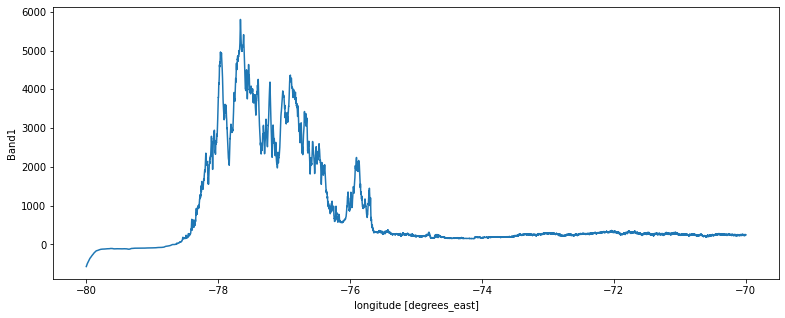

In [5]:
ds_dem.mean(dim='lat').Band1.plot(figsize=(13, 5))

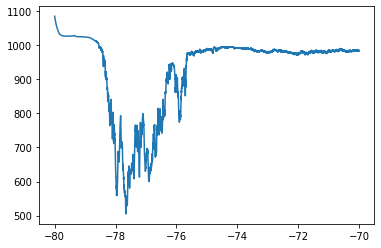

In [6]:
P_dem = 101.325*np.exp(-0.00012*ds_dem.mean(dim='lat').Band1.values)*10
plt.plot(ds_dem.lon,P_dem)

In [7]:
rh_m = ds.mean(dim='time').mean(dim='latitude')
rh_m = rh_m.q
rh_st = ds.std(dim='time').std(dim='latitude')
rh_st = rh_st.q

rh_16 = ds.sel(time=slice('1996-09-01', '1997-08-31')).mean(dim='time').mean(dim='latitude')
rh_16 = rh_16.q

rh_anom_96 = rh_16 - rh_m

rh_16 = ds.sel(time=slice('2007-09-01', '2008-08-31')).mean(dim='time').mean(dim='latitude')
rh_16 = rh_16.q

rh_anom_07 = rh_16 - rh_m

rh_16 = ds.sel(time=slice('2016-09-01', '2017-08-31')).mean(dim='time').mean(dim='latitude')
rh_16 = rh_16.q

rh_anom_16 = rh_16 - rh_m

rh_m.min()

<xarray.DataArray 'q' ()>
array(2.5689194e-06, dtype=float32)

In [8]:
cmap = mpl.cm.jet
cmap_r = reverse_colourmap(cmap)

In [9]:
alt_aws = 101.325*np.exp(-0.00012*4910)*10
alt_aws

562.1216387372629

In [10]:
rh_anom_96

<xarray.DataArray 'q' (level: 37, longitude: 41)>
array([[ 2.6331236e-08,  2.5689133e-08,  2.5047029e-08, ...,
         2.7615897e-08,  2.6973794e-08,  2.7615897e-08],
       [ 6.4221695e-09,  6.4221695e-09,  6.4221695e-09, ...,
         1.2844339e-09,  1.2844339e-09,  1.2844339e-09],
       [-6.4218739e-08, -6.3576408e-08, -6.3576408e-08, ...,
        -3.6602842e-08, -3.7245172e-08, -3.7245172e-08],
       ...,
       [ 3.0217879e-04,  3.2974221e-04,  3.7873257e-04, ...,
         2.7238578e-04,  2.4363585e-04,  1.5129242e-04],
       [ 3.4900103e-04,  3.7301239e-04,  3.6590640e-04, ...,
         2.2281334e-04,  2.3577176e-04,  2.3114681e-04],
       [ 2.6879273e-04,  3.3441279e-04,  3.6126282e-04, ...,
         1.0055117e-04,  1.2764148e-04,  1.2401864e-04]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -80.0 -79.75 -79.5 ... -70.5 -70.25 -70.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000

In [11]:
rh_anom_96.sel(longitude=-77.62, level=alt_aws, method='nearest')

<xarray.DataArray 'q' ()>
array(-0.00035952, dtype=float32)
Coordinates:
    longitude  float32 -77.5
    level      int32 550

In [12]:
rh_anom_07.sel(longitude=-77.62, level=alt_aws, method='nearest')

<xarray.DataArray 'q' ()>
array(-0.00074652, dtype=float32)
Coordinates:
    longitude  float32 -77.5
    level      int32 550

In [13]:
rh_anom_16.sel(longitude=-77.62, level=alt_aws, method='nearest')

<xarray.DataArray 'q' ()>
array(0.000126, dtype=float32)
Coordinates:
    longitude  float32 -77.5
    level      int32 550

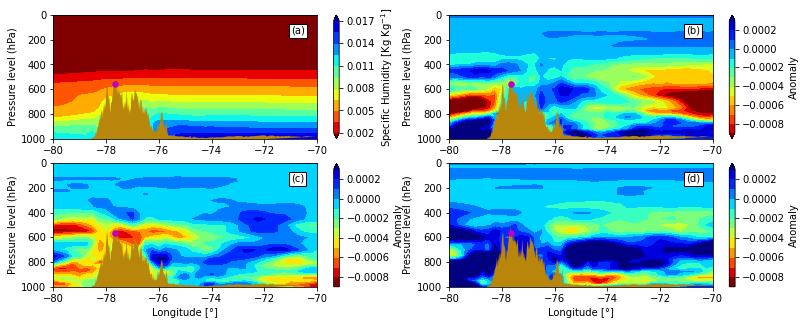

In [14]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 5))
rh_m.plot.contourf(ax=ax1, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(0.002,0.018,0.0015),
                   vmin=0.00, vmax=0.02, cmap=cmap_r,
                   cbar_kwargs={'label': 'Specific Humidity [Kg Kg$^{-1}$]'})
ax1.set_xlabel('')
ax1.set_ylabel('Pressure level (hPa)')
ax1.set_ylim(1000, 0)
ax1.set_xticks(np.arange(-80, -62, 2))
ax1.set_xlim(-80, -70)
#ax1.plot(ds_dem.lon,P_dem,linewidth=1, color='k')
ax1.fill(ds_dem.lon, P_dem, facecolor=('darkgoldenrod'))
#ax1.axvline(-77.62, linewidth=1, color='w', linestyle ='--')
#ax1.axhline(600, linewidth=1, color='w', linestyle ='--')
ax1.plot(-77.65,alt_aws,'mo', markersize=5.5)
ax1.text(-71.00, 150, "(a)", 
             bbox={'facecolor': 'w', 'pad': 2})

rh_anom_96.plot.contourf(ax=ax2, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-0.0009,0.0004,0.0001),
                   vmin=-0.002, vmax=0.0006, cmap=cmap_r,
                   cbar_kwargs={'label': 'Anomaly'})
ax2.set_xlabel('')
ax2.set_ylabel('Pressure level (hPa)')
ax2.set_ylim(1000, 0)
ax2.set_xticks(np.arange(-80, -62, 2))
ax2.set_xlim(-80, -70)
#ax2.axvline(-77.62, linewidth=1, color='w', linestyle ='--')
ax2.fill(ds_dem.lon, P_dem, facecolor=('darkgoldenrod'))
#ax2.axhline(600, linewidth=1, color='w', linestyle ='--')
ax2.plot(-77.65,alt_aws,'mo', markersize=5.5)
ax2.text(-71.00, 150, "(b)", 
             bbox={'facecolor': 'w', 'pad': 2})

rh_anom_07.plot.contourf(ax=ax3, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-0.0009,0.0004,0.0001),
                   vmin=-0.002, vmax=0.0006, cmap=cmap_r,
                   cbar_kwargs={'label': 'Anomaly'})
ax3.set_xlabel('Longitude [°]')
ax3.set_ylabel('Pressure level (hPa)')
ax3.set_ylim(1000, 0)
ax3.set_xticks(np.arange(-80, -66, 2))
ax3.set_xlim(-80, -70)
#ax3.axvline(-77.62, linewidth=1, color='w', linestyle ='--')
ax3.fill(ds_dem.lon, P_dem, facecolor=('darkgoldenrod'))
#ax3.axhline(600, linewidth=1, color='w', linestyle ='--')
ax3.plot(-77.65,alt_aws,'mo', markersize=5.5)
ax3.text(-71.00, 150, "(c)", 
             bbox={'facecolor': 'w', 'pad': 2})

rh_anom_16.plot.contourf(ax=ax4, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-0.0009,0.0004,0.0001),
                   vmin=-0.002, vmax=0.0006, cmap=cmap_r,
                   cbar_kwargs={'label': 'Anomaly'})
ax4.set_xlabel('Longitude [°]')
ax4.set_ylabel('Pressure level (hPa)')
ax4.set_ylim(1000, 0)
ax4.set_xticks(np.arange(-80, -66, 2))
ax4.set_xlim(-80, -70)
#ax4.axvline(-77.62, linewidth=1, color='w', linestyle ='--')
ax4.fill(ds_dem.lon, P_dem, facecolor=('darkgoldenrod'))
#ax4.axhline(600, linewidth=1, color='w', linestyle ='--')
ax4.plot(-77.65,alt_aws,'mo', markersize=5.5)
ax4.text(-71.00, 150, "(d)", 
             bbox={'facecolor': 'w', 'pad': 2})

font_f = 10
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize
f.savefig('out/gh.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)


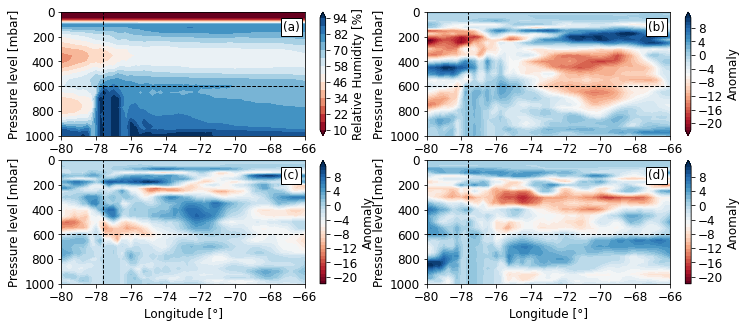

In [191]:
rh_m = ds.mean(dim='time').mean(dim='latitude')
rh_m = rh_m.r

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 5))
rh_m.plot.contourf(ax=ax1, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(10,96,6),
                   vmin=0, vmax=100, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Relative Humidity [%]'})
ax1.set_xlabel('')
ax1.set_ylabel('Pressure level [mbar]')
ax1.set_ylim(1000, 0)
ax1.set_xticks(np.arange(-80, -62, 2))
ax1.set_xlim(-80, -66)
ax1.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax1.axhline(600, linewidth=1, color='k', linestyle ='--')
ax1.text(-67.25, 150, "(a)", 
             bbox={'facecolor': 'w', 'pad': 2})

rh_anom_96.plot.contourf(ax=ax2, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-22,12,1),
                   vmin=-18, vmax=12, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Anomaly'})
ax2.set_xlabel('')
ax2.set_ylabel('Pressure level [mbar]')
ax2.set_ylim(1000, 0)
ax2.set_xticks(np.arange(-80, -62, 2))
ax2.set_xlim(-80, -66)
ax2.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax2.axhline(600, linewidth=1, color='k', linestyle ='--')
ax2.text(-67.25, 150, "(b)", 
             bbox={'facecolor': 'w', 'pad': 2})

rh_anom_07.plot.contourf(ax=ax3, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-22,12,1),
                   vmin=-18, vmax=12, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Anomaly'})
ax3.set_xlabel('Longitude [°]')
ax3.set_ylabel('Pressure level [mbar]')
ax3.set_ylim(1000, 0)
ax3.set_xticks(np.arange(-80, -62, 2))
ax3.set_xlim(-80, -66)
ax3.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax3.axhline(600, linewidth=1, color='k', linestyle ='--')
ax3.text(-67.25, 150, "(c)", 
             bbox={'facecolor': 'w', 'pad': 2})

rh_anom_16.plot.contourf(ax=ax4, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-22,12,1),
                   vmin=-18, vmax=12, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Anomaly'})
ax4.set_xlabel('Longitude [°]')
ax4.set_ylabel('Pressure level [mbar]')
ax4.set_ylim(1000, 0)
ax4.set_xticks(np.arange(-80, -62, 2))
ax4.set_xlim(-80, -66)
ax4.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax4.axhline(600, linewidth=1, color='k', linestyle ='--')
ax4.text(-67.25, 150, "(d)", 
             bbox={'facecolor': 'w', 'pad': 2})

font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize
f.savefig('out/rh.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)


In [171]:
rh_m = ds.mean(dim='time').mean(dim='latitude')
rh_m = rh_m.r
rh_st = ds.std(dim='time').std(dim='latitude')
rh_st = rh_st.r

rh_16 = ds.sel(time=slice('2007-09-01', '2008-08-31')).mean(dim='time').mean(dim='latitude')
rh_16 = rh_16.r

rh_anom = rh_16 - rh_m
rh_anom.min()

<xarray.DataArray 'r' ()>
array(-14.634083, dtype=float32)

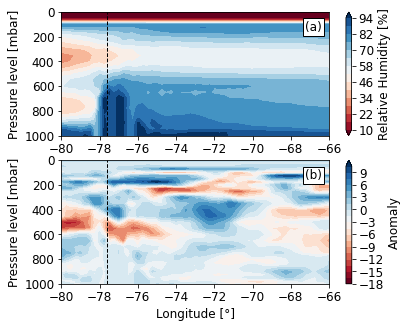

In [172]:
rh_m = ds.mean(dim='time').mean(dim='latitude')
rh_m = rh_m.r

f, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(6, 5))
im1 = rh_m.plot.contourf(ax=ax1, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(10,96,6),
                   vmin=0, vmax=100, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Relative Humidity [%]'})
ax1.set_xlabel('')
ax1.set_ylabel('Pressure level [mbar]')
ax1.set_ylim(1000, 0)
ax1.set_xticks(np.arange(-80, -62, 2))
ax1.set_xlim(-80, -66)
ax1.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax1.text(-67.25, 150, "(a)", 
             bbox={'facecolor': 'w', 'pad': 2})

im2 = rh_anom.plot.contourf(ax=ax2, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-18,12,1.5),
                   vmin=-18, vmax=12, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Anomaly'})
ax2.set_xlabel('Longitude [°]')
ax2.set_ylabel('Pressure level [mbar]')
ax2.set_ylim(1000, 0)
ax2.set_xticks(np.arange(-80, -62, 2))
ax2.set_xlim(-80, -66)
ax2.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax2.text(-67.25, 150, "(b)", 
             bbox={'facecolor': 'w', 'pad': 2})

font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize
f.savefig('out/rh_nina.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)


In [174]:
rh_m = ds.mean(dim='time').mean(dim='latitude')
rh_m = rh_m.r
rh_st = ds.std(dim='time').std(dim='latitude')
rh_st = rh_st.r

rh_16 = ds.sel(time=slice('1996-09-01', '1997-08-31')).mean(dim='time').mean(dim='latitude')
rh_16 = rh_16.r

rh_anom = rh_16 - rh_m
rh_anom.max()

<xarray.DataArray 'r' ()>
array(12.644722, dtype=float32)

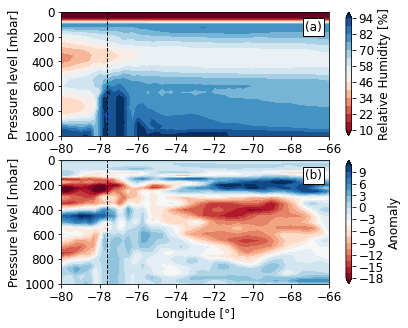

In [175]:
rh_m = ds.mean(dim='time').mean(dim='latitude')
rh_m = rh_m.r

f, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(6, 5))
im1 = rh_m.plot.contourf(ax=ax1, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(10,96,6),
                   vmin=0, vmax=100, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Relative Humidity [%]'})
ax1.set_xlabel('')
ax1.set_ylabel('Pressure level [mbar]')
ax1.set_ylim(1000, 0)
ax1.set_xticks(np.arange(-80, -62, 2))
ax1.set_xlim(-80, -66)
ax1.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax1.text(-67.25, 150, "(a)", 
             bbox={'facecolor': 'w', 'pad': 2})

im2 = rh_anom.plot.contourf(ax=ax2, x = 'longitude', y = 'level',yincrease=False,levels=np.arange(-18,12,1.5),
                   vmin=-18, vmax=12, cmap=plt.cm.RdBu,
                   cbar_kwargs={'label': 'Anomaly'})
ax2.set_xlabel('Longitude [°]')
ax2.set_ylabel('Pressure level [mbar]')
ax2.set_ylim(1000, 0)
ax2.set_xticks(np.arange(-80, -62, 2))
ax2.set_xlim(-80, -66)
ax2.axvline(-77.62, linewidth=1, color='k', linestyle ='--')
ax2.text(-67.25, 150, "(b)", 
             bbox={'facecolor': 'w', 'pad': 2})

font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize
f.savefig('out/rh_normal.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)


In [148]:
np.arange(5,100,5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])

In [55]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [57]:
air = ds.air.isel(time=0)
air

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
        238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
        239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
        241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
        294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
        295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
        296.6    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Text(0.5, 0, '')

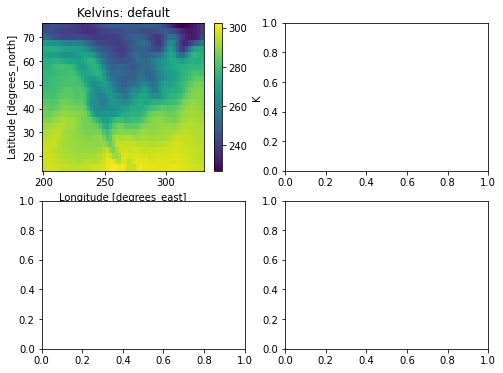

In [58]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# The first plot (in kelvins) chooses "viridis" and uses the data's min/max
air.plot(ax=ax1, cbar_kwargs={'label': 'K'})
ax1.set_title('Kelvins: default')
ax2.set_xlabel('')